# 1. Importing Dependencies

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Setting the theme Seaborn Plots across the notebook

In [3]:
sns.set(style = 'whitegrid')

# 2. Loading Processed Data

In [4]:
df = pd.read_csv('processed_data.csv')

#### Choosing the Target Variable
The target variable is set as `bill_amt1`, which represents the **next month’s billing amount** for a customer.  
This variable is chosen because it directly reflects short-term financial activity and helps identify spending or repayment trends.

Selecting this target allows the model to learn patterns that predict how much a customer is likely to owe next month.  
Such predictions can assist credit analysts in identifying customers at risk of overspending or requiring credit adjustments.

If an irrelevant or indirect variable were chosen as the target, the model’s predictions would lose business meaning and accuracy, making the results difficult to interpret or apply.


In [5]:
TARGET = 'bill_amt1'

# 3. Data Visualisation

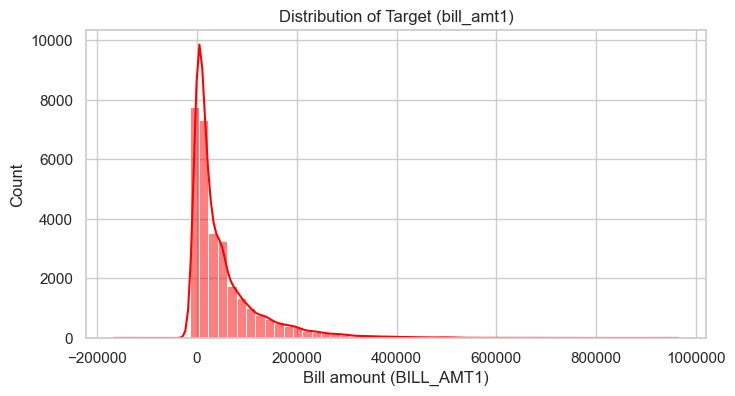

In [8]:
# Distribution of target
plt.figure(figsize=(8, 4))
sns.histplot(df[TARGET], bins=60, kde=True, color='red')  # set color to red
plt.title('Distribution of Target (bill_amt1)')
plt.xlabel('Bill amount (BILL_AMT1)')

# Turn off scientific notation on the x-axis
plt.ticklabel_format(style='plain', axis='x')

plt.show()

## `A. Distribution of Target`

* This plot shows the distribution of the target variable `BILL_AMT1`, representing the bill amount for the first month.

* The data is **heavily right-skewed**, meaning most customers have relatively low bill amounts, while a few have extremely high ones.

* The long right tail suggests the presence of **outliers or high spenders*


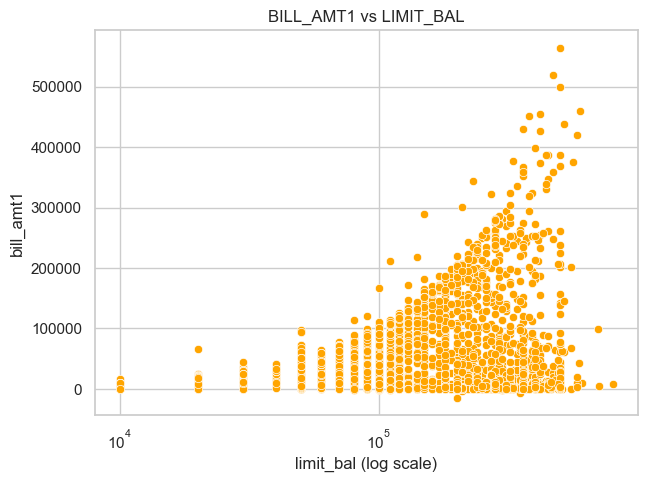

In [12]:
# Scatter Plot: bill_amt1 vs limit_bal
plt.figure(figsize=(7,5))
sns.scatterplot(
    x='limit_bal',
    y='bill_amt1',
    data=df.sample(3000, random_state=42),
    color='orange'  # make points yellow
)
plt.title('BILL_AMT1 vs LIMIT_BAL')
plt.xscale('log')
plt.xlabel('limit_bal (log scale)')
plt.show()

## ` B. Bill Amount vs Limit Balance`

* This plot examines the relationship between `BILL_AMT1` (bill amount) and `LIMIT_BAL` (credit limit).

* The positive trend indicates that customers with higher credit limits generally have larger bill amounts.

* However, the spread widens for higher values, showing greater variability among high-limit customers.

* The log scale on the x-axis helps in visualizing the wide range of credit limits more clearly and reveals that the relationship is non-linear but correlated.

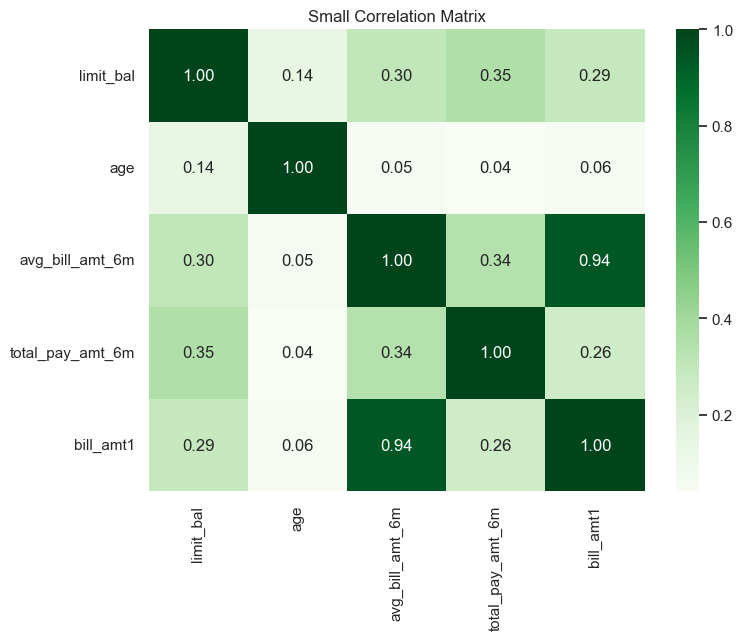

In [14]:
# Correlation heatmap
corr_cols = ['limit_bal','age','avg_bill_amt_6m','total_pay_amt_6m','bill_amt1']
corr = df[corr_cols].corr()
plt.figure(figsize = (8,6))
sns.heatmap(corr, annot = True, fmt = '.2f', cmap='Greens')
plt.title('Small Correlation Matrix')
plt.show()

## `C. Small Correlation Matrix`

This heatmap visualizes the pairwise correlations between selected numerical variables.

* `bill_amt1` has a **very strong correlation (0.94)** with `avg_bill_amt_6m`, indicating that current bill amount closely tracks the average over six months.

* `limit_bal` shows **moderate correlations** with billing and payment features, meaning higher limits tend to accompany higher spending and repayments.

* `age` shows **weak correlations** with all financial features, suggesting that credit behavior is not strongly age-dependent.

* Overall, the matrix highlights that **billing patterns are more predictive of current bills than demographic factors**.
